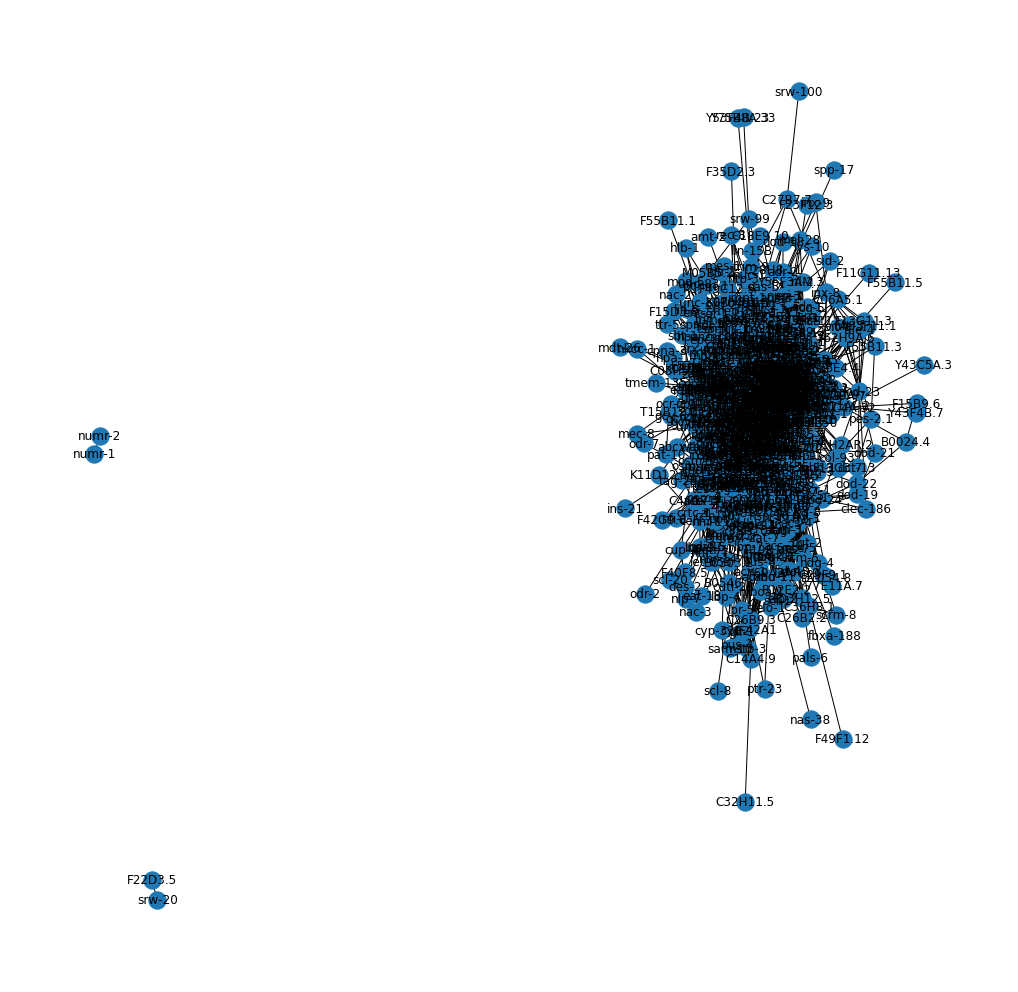

Graph named 'Protein Interaction Graph' with 825 nodes and 10655 edges
effective_information(G) = 5.420533831393049
Effectiveness: 0.559496


In [3]:
### The required libraries and packages ###
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
#For effective information
import ei_net
from ei_net import *
# List of genes to search for
list1= open("celegangenes.txt").read()
# split line by "," into list of strings
geneList = list1.rstrip().split("\n")
#Convert genes into proteins
proteins = '%0d'.join(geneList)
#Define the URL
url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=6239'
r = requests.get(url)
lines = r.text.split('\n') # pull the text from the response object and split based on new lines
data = [l.split('\t') for l in lines] # split each line into its components based on tabs
# convert to dataframe using the first row as the column names; drop empty, final row
df = pd.DataFrame(data[1:-1], columns = data[0]) 
# dataframe with the preferred names of the two proteins and the score of the interaction
interactions = df[['preferredName_A', 'preferredName_B', 'score']]  

G=nx.Graph(name='Protein Interaction Graph')
interactions = np.array(interactions)
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # protein a node
    b = interaction[1] # protein b node
    w = float(interaction[2]) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,w)]) # add weighted edge to graph
    
pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(18,18))
nx.draw_networkx(G)
plt.axis('off')
plt.show()


#Get the information about graph
print(nx.info(G))

N = G.number_of_nodes()

#Get the effetciveness information
print("effective_information(G) =", effective_information(G))
eff = (effective_information(G))/np.log2(N)
print("Effectiveness: %.6f"%eff)


In [11]:
import ei_net
from ei_net import *

import ce_net
from ce_net import *

import networkx as nx

import numpy as np

EI_micro = effective_information(G)

CE = causal_emergence(G)

print("Casual Emergence:",CE)


EI_macro = CE["EI_macro"]

print("EI macro: %.6f"%EI_macro)



N = G.number_of_nodes()

eff_gain = (EI_macro-EI_micro)/np.log2(N)
print("Effectiveness gain: %.6f"%eff_gain)



Starting with this TPM:
 [[0.     0.2529 0.3214 ... 0.     0.     0.    ]
 [0.1357 0.     0.     ... 0.     0.127  0.    ]
 [0.3661 0.     0.     ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     1.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]]

Search started ... EI_micro = 5.4205

Checking node 00274 (0.0% done)... coarse-grained network size = 00825
	Just found a successful macro grouping ... the EI_current = 5.4211
	Just found a successful macro grouping ... the EI_current = 5.4217
Checking node 00066 (0.1% done)... coarse-grained network size = 00823
	Just found a successful macro grouping ... the EI_current = 5.4222
	Just found a successful macro grouping ... the EI_current = 5.4225
	Just found a successful macro grouping ... the EI_current = 5.4235
	Just found a successful macro grouping ... the EI_current = 5.4250
	Just found a successful macro grouping ... the EI_current = 5.4267
	Just found a succ

KeyboardInterrupt: 

In [5]:
EI_macro = CE["EI_macro"]

print("EI macro: %.6f"%EI_macro)


print(nx.info(CE["G_macro"]))

N = G.number_of_nodes()

eff_gain = (EI_macro-EI_micro)/np.log2(N)
print("Effectiveness gain: %.6f"%eff_gain)

#Get the effetciveness information
print("Effective Information =", EI_macro)

EI macro: 5.461184
DiGraph with 788 nodes and 17380 edges
Effectiveness gain: 0.004196
Effective Information = 5.461184290393835


In [9]:
CE2 = causal_emergence_spectral(CE["G_macro"])

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass reachability=[       inf 0.78068923 0.61777825 0.64892347 0.36133225 0.19652796
 0.43855359 0.25449063 0.29640472 0.39864369 0.31354346 0.25577539
 0.11742158 0.2405622  0.39073409 0.49756497 0.34016679 0.39073409
 0.25350559 0.34071049 0.34960662 0.24315535 0.34910283 0.20349895
 0.53779801 0.45362151 0.21582069 0.22761987 0.42710367 0.20931092
 0.22390094 0.20397012 0.22390094 0.36818723 0.37501666 0.22260906
 0.09631739 0.11742158 0.12829228 0.25611157 0.25565413 0.19105748
 0.34910283 0.53126305 0.25611157 0.28345149 0.12630116 0.14295761
 0.17549291 0.18423968 0.183748   0.11671259 0.12031684 0.18172944
 0.1443546  0.152712   0.59858953 0.20397012 0.3209911  0.21448668
 0.18137792 0.16706605 0.11671259 0.14488538 0.152712   0.2373284
 0.16270564 0.19303164 0.15829004 0.12829228 0.1595709  0.13029384
 0.09404367 0.11977308 0.19252234 0.53306464 0.10711321 0.07565922
 0.0882

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass reachability=[       inf 0.78068923 0.61777825 0.64892347 0.36133225 0.19652796
 0.43855359 0.25449063 0.29640472 0.39864369 0.31354346 0.25577539
 0.11742158 0.2405622  0.39073409 0.49756497 0.34016679 0.39073409
 0.25350559 0.34071049 0.34960662 0.24315535 0.34910283 0.20349895
 0.53779801 0.45362151 0.21582069 0.22761987 0.42710367 0.20931092
 0.22390094 0.20397012 0.22390094 0.36818723 0.37501666 0.22260906
 0.09631739 0.11742158 0.12829228 0.25611157 0.25565413 0.19105748
 0.34910283 0.53126305 0.25611157 0.28345149 0.12630116 0.14295761
 0.17549291 0.18423968 0.183748   0.11671259 0.12031684 0.18172944
 0.1443546  0.152712   0.59858953 0.20397012 0.3209911  0.21448668
 0.18137792 0.16706605 0.11671259 0.14488538 0.152712   0.2373284
 0.16270564 0.19303164 0.15829004 0.12829228 0.1595709  0.13029384
 0.09404367 0.11977308 0.19252234 0.53306464 0.10711321 0.07565922
 0.0882

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass reachability=[       inf 0.78068923 0.61777825 0.64892347 0.36133225 0.19652796
 0.43855359 0.25449063 0.29640472 0.39864369 0.31354346 0.25577539
 0.11742158 0.2405622  0.39073409 0.49756497 0.34016679 0.39073409
 0.25350559 0.34071049 0.34960662 0.24315535 0.34910283 0.20349895
 0.53779801 0.45362151 0.21582069 0.22761987 0.42710367 0.20931092
 0.22390094 0.20397012 0.22390094 0.36818723 0.37501666 0.22260906
 0.09631739 0.11742158 0.12829228 0.25611157 0.25565413 0.19105748
 0.34910283 0.53126305 0.25611157 0.28345149 0.12630116 0.14295761
 0.17549291 0.18423968 0.183748   0.11671259 0.12031684 0.18172944
 0.1443546  0.152712   0.59858953 0.20397012 0.3209911  0.21448668
 0.18137792 0.16706605 0.11671259 0.14488538 0.152712   0.2373284
 0.16270564 0.19303164 0.15829004 0.12829228 0.1595709  0.13029384
 0.09404367 0.11977308 0.19252234 0.53306464 0.10711321 0.07565922
 0.0882

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass reachability=[       inf 0.78068923 0.61777825 0.64892347 0.36133225 0.19652796
 0.43855359 0.25449063 0.29640472 0.39864369 0.31354346 0.25577539
 0.11742158 0.2405622  0.39073409 0.49756497 0.34016679 0.39073409
 0.25350559 0.34071049 0.34960662 0.24315535 0.34910283 0.20349895
 0.53779801 0.45362151 0.21582069 0.22761987 0.42710367 0.20931092
 0.22390094 0.20397012 0.22390094 0.36818723 0.37501666 0.22260906
 0.09631739 0.11742158 0.12829228 0.25611157 0.25565413 0.19105748
 0.34910283 0.53126305 0.25611157 0.28345149 0.12630116 0.14295761
 0.17549291 0.18423968 0.183748   0.11671259 0.12031684 0.18172944
 0.1443546  0.152712   0.59858953 0.20397012 0.3209911  0.21448668
 0.18137792 0.16706605 0.11671259 0.14488538 0.152712   0.2373284
 0.16270564 0.19303164 0.15829004 0.12829228 0.1595709  0.13029384
 0.09404367 0.11977308 0.19252234 0.53306464 0.10711321 0.07565922
 0.0882

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass reachability=[       inf 0.78068923 0.61777825 0.64892347 0.36133225 0.19652796
 0.43855359 0.25449063 0.29640472 0.39864369 0.31354346 0.25577539
 0.11742158 0.2405622  0.39073409 0.49756497 0.34016679 0.39073409
 0.25350559 0.34071049 0.34960662 0.24315535 0.34910283 0.20349895
 0.53779801 0.45362151 0.21582069 0.22761987 0.42710367 0.20931092
 0.22390094 0.20397012 0.22390094 0.36818723 0.37501666 0.22260906
 0.09631739 0.11742158 0.12829228 0.25611157 0.25565413 0.19105748
 0.34910283 0.53126305 0.25611157 0.28345149 0.12630116 0.14295761
 0.17549291 0.18423968 0.183748   0.11671259 0.12031684 0.18172944
 0.1443546  0.152712   0.59858953 0.20397012 0.3209911  0.21448668
 0.18137792 0.16706605 0.11671259 0.14488538 0.152712   0.2373284
 0.16270564 0.19303164 0.15829004 0.12829228 0.1595709  0.13029384
 0.09404367 0.11977308 0.19252234 0.53306464 0.10711321 0.07565922
 0.0882

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass reachability=[       inf 0.78068923 0.61777825 0.64892347 0.36133225 0.19652796
 0.43855359 0.25449063 0.29640472 0.39864369 0.31354346 0.25577539
 0.11742158 0.2405622  0.39073409 0.49756497 0.34016679 0.39073409
 0.25350559 0.34071049 0.34960662 0.24315535 0.34910283 0.20349895
 0.53779801 0.45362151 0.21582069 0.22761987 0.42710367 0.20931092
 0.22390094 0.20397012 0.22390094 0.36818723 0.37501666 0.22260906
 0.09631739 0.11742158 0.12829228 0.25611157 0.25565413 0.19105748
 0.34910283 0.53126305 0.25611157 0.28345149 0.12630116 0.14295761
 0.17549291 0.18423968 0.183748   0.11671259 0.12031684 0.18172944
 0.1443546  0.152712   0.59858953 0.20397012 0.3209911  0.21448668
 0.18137792 0.16706605 0.11671259 0.14488538 0.152712   0.2373284
 0.16270564 0.19303164 0.15829004 0.12829228 0.1595709  0.13029384
 0.09404367 0.11977308 0.19252234 0.53306464 0.10711321 0.07565922
 0.0882

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass reachability=[       inf 0.78068923 0.61777825 0.64892347 0.36133225 0.19652796
 0.43855359 0.25449063 0.29640472 0.39864369 0.31354346 0.25577539
 0.11742158 0.2405622  0.39073409 0.49756497 0.34016679 0.39073409
 0.25350559 0.34071049 0.34960662 0.24315535 0.34910283 0.20349895
 0.53779801 0.45362151 0.21582069 0.22761987 0.42710367 0.20931092
 0.22390094 0.20397012 0.22390094 0.36818723 0.37501666 0.22260906
 0.09631739 0.11742158 0.12829228 0.25611157 0.25565413 0.19105748
 0.34910283 0.53126305 0.25611157 0.28345149 0.12630116 0.14295761
 0.17549291 0.18423968 0.183748   0.11671259 0.12031684 0.18172944
 0.1443546  0.152712   0.59858953 0.20397012 0.3209911  0.21448668
 0.18137792 0.16706605 0.11671259 0.14488538 0.152712   0.2373284
 0.16270564 0.19303164 0.15829004 0.12829228 0.1595709  0.13029384
 0.09404367 0.11977308 0.19252234 0.53306464 0.10711321 0.07565922
 0.0882

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass reachability=[       inf 0.78068923 0.61777825 0.64892347 0.36133225 0.19652796
 0.43855359 0.25449063 0.29640472 0.39864369 0.31354346 0.25577539
 0.11742158 0.2405622  0.39073409 0.49756497 0.34016679 0.39073409
 0.25350559 0.34071049 0.34960662 0.24315535 0.34910283 0.20349895
 0.53779801 0.45362151 0.21582069 0.22761987 0.42710367 0.20931092
 0.22390094 0.20397012 0.22390094 0.36818723 0.37501666 0.22260906
 0.09631739 0.11742158 0.12829228 0.25611157 0.25565413 0.19105748
 0.34910283 0.53126305 0.25611157 0.28345149 0.12630116 0.14295761
 0.17549291 0.18423968 0.183748   0.11671259 0.12031684 0.18172944
 0.1443546  0.152712   0.59858953 0.20397012 0.3209911  0.21448668
 0.18137792 0.16706605 0.11671259 0.14488538 0.152712   0.2373284
 0.16270564 0.19303164 0.15829004 0.12829228 0.1595709  0.13029384
 0.09404367 0.11977308 0.19252234 0.53306464 0.10711321 0.07565922
 0.0882

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass reachability=[       inf 0.78068923 0.61777825 0.64892347 0.36133225 0.19652796
 0.43855359 0.25449063 0.29640472 0.39864369 0.31354346 0.25577539
 0.11742158 0.2405622  0.39073409 0.49756497 0.34016679 0.39073409
 0.25350559 0.34071049 0.34960662 0.24315535 0.34910283 0.20349895
 0.53779801 0.45362151 0.21582069 0.22761987 0.42710367 0.20931092
 0.22390094 0.20397012 0.22390094 0.36818723 0.37501666 0.22260906
 0.09631739 0.11742158 0.12829228 0.25611157 0.25565413 0.19105748
 0.34910283 0.53126305 0.25611157 0.28345149 0.12630116 0.14295761
 0.17549291 0.18423968 0.183748   0.11671259 0.12031684 0.18172944
 0.1443546  0.152712   0.59858953 0.20397012 0.3209911  0.21448668
 0.18137792 0.16706605 0.11671259 0.14488538 0.152712   0.2373284
 0.16270564 0.19303164 0.15829004 0.12829228 0.1595709  0.13029384
 0.09404367 0.11977308 0.19252234 0.53306464 0.10711321 0.07565922
 0.0882

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass reachability=[       inf 0.78068923 0.61777825 0.64892347 0.36133225 0.19652796
 0.43855359 0.25449063 0.29640472 0.39864369 0.31354346 0.25577539
 0.11742158 0.2405622  0.39073409 0.49756497 0.34016679 0.39073409
 0.25350559 0.34071049 0.34960662 0.24315535 0.34910283 0.20349895
 0.53779801 0.45362151 0.21582069 0.22761987 0.42710367 0.20931092
 0.22390094 0.20397012 0.22390094 0.36818723 0.37501666 0.22260906
 0.09631739 0.11742158 0.12829228 0.25611157 0.25565413 0.19105748
 0.34910283 0.53126305 0.25611157 0.28345149 0.12630116 0.14295761
 0.17549291 0.18423968 0.183748   0.11671259 0.12031684 0.18172944
 0.1443546  0.152712   0.59858953 0.20397012 0.3209911  0.21448668
 0.18137792 0.16706605 0.11671259 0.14488538 0.152712   0.2373284
 0.16270564 0.19303164 0.15829004 0.12829228 0.1595709  0.13029384
 0.09404367 0.11977308 0.19252234 0.53306464 0.10711321 0.07565922
 0.0882

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass reachability=[       inf 0.78068923 0.61777825 0.64892347 0.36133225 0.19652796
 0.43855359 0.25449063 0.29640472 0.39864369 0.31354346 0.25577539
 0.11742158 0.2405622  0.39073409 0.49756497 0.34016679 0.39073409
 0.25350559 0.34071049 0.34960662 0.24315535 0.34910283 0.20349895
 0.53779801 0.45362151 0.21582069 0.22761987 0.42710367 0.20931092
 0.22390094 0.20397012 0.22390094 0.36818723 0.37501666 0.22260906
 0.09631739 0.11742158 0.12829228 0.25611157 0.25565413 0.19105748
 0.34910283 0.53126305 0.25611157 0.28345149 0.12630116 0.14295761
 0.17549291 0.18423968 0.183748   0.11671259 0.12031684 0.18172944
 0.1443546  0.152712   0.59858953 0.20397012 0.3209911  0.21448668
 0.18137792 0.16706605 0.11671259 0.14488538 0.152712   0.2373284
 0.16270564 0.19303164 0.15829004 0.12829228 0.1595709  0.13029384
 0.09404367 0.11977308 0.19252234 0.53306464 0.10711321 0.07565922
 0.0882

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass reachability=[       inf 0.78068923 0.61777825 0.64892347 0.36133225 0.19652796
 0.43855359 0.25449063 0.29640472 0.39864369 0.31354346 0.25577539
 0.11742158 0.2405622  0.39073409 0.49756497 0.34016679 0.39073409
 0.25350559 0.34071049 0.34960662 0.24315535 0.34910283 0.20349895
 0.53779801 0.45362151 0.21582069 0.22761987 0.42710367 0.20931092
 0.22390094 0.20397012 0.22390094 0.36818723 0.37501666 0.22260906
 0.09631739 0.11742158 0.12829228 0.25611157 0.25565413 0.19105748
 0.34910283 0.53126305 0.25611157 0.28345149 0.12630116 0.14295761
 0.17549291 0.18423968 0.183748   0.11671259 0.12031684 0.18172944
 0.1443546  0.152712   0.59858953 0.20397012 0.3209911  0.21448668
 0.18137792 0.16706605 0.11671259 0.14488538 0.152712   0.2373284
 0.16270564 0.19303164 0.15829004 0.12829228 0.1595709  0.13029384
 0.09404367 0.11977308 0.19252234 0.53306464 0.10711321 0.07565922
 0.0882

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass reachability=[       inf 0.78068923 0.61777825 0.64892347 0.36133225 0.19652796
 0.43855359 0.25449063 0.29640472 0.39864369 0.31354346 0.25577539
 0.11742158 0.2405622  0.39073409 0.49756497 0.34016679 0.39073409
 0.25350559 0.34071049 0.34960662 0.24315535 0.34910283 0.20349895
 0.53779801 0.45362151 0.21582069 0.22761987 0.42710367 0.20931092
 0.22390094 0.20397012 0.22390094 0.36818723 0.37501666 0.22260906
 0.09631739 0.11742158 0.12829228 0.25611157 0.25565413 0.19105748
 0.34910283 0.53126305 0.25611157 0.28345149 0.12630116 0.14295761
 0.17549291 0.18423968 0.183748   0.11671259 0.12031684 0.18172944
 0.1443546  0.152712   0.59858953 0.20397012 0.3209911  0.21448668
 0.18137792 0.16706605 0.11671259 0.14488538 0.152712   0.2373284
 0.16270564 0.19303164 0.15829004 0.12829228 0.1595709  0.13029384
 0.09404367 0.11977308 0.19252234 0.53306464 0.10711321 0.07565922
 0.0882

/Users/benjamin/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass reachability=[       inf 0.78068923 0.61777825 0.64892347 0.36133225 0.19652796
 0.43855359 0.25449063 0.29640472 0.39864369 0.31354346 0.25577539
 0.11742158 0.2405622  0.39073409 0.49756497 0.34016679 0.39073409
 0.25350559 0.34071049 0.34960662 0.24315535 0.34910283 0.20349895
 0.53779801 0.45362151 0.21582069 0.22761987 0.42710367 0.20931092
 0.22390094 0.20397012 0.22390094 0.36818723 0.37501666 0.22260906
 0.09631739 0.11742158 0.12829228 0.25611157 0.25565413 0.19105748
 0.34910283 0.53126305 0.25611157 0.28345149 0.12630116 0.14295761
 0.17549291 0.18423968 0.183748   0.11671259 0.12031684 0.18172944
 0.1443546  0.152712   0.59858953 0.20397012 0.3209911  0.21448668
 0.18137792 0.16706605 0.11671259 0.14488538 0.152712   0.2373284
 0.16270564 0.19303164 0.15829004 0.12829228 0.1595709  0.13029384
 0.09404367 0.11977308 0.19252234 0.53306464 0.10711321 0.07565922
 0.0882

In [10]:
EI_macro = CE2["EI_macro"]

print("EI macro: %.6f"%EI_macro)


print(nx.info(CE2["G_macro"]))

N = G.number_of_nodes()

eff_gain = (EI_macro-EI_micro)/np.log2(N)
print("Effectiveness gain: %.6f"%eff_gain)

#Get the effetciveness information
print("Effective Information =", EI_macro)

EI macro: 5.461184
DiGraph with 788 nodes and 17380 edges
Effectiveness gain: 0.004196
Effective Information = 5.461184290393835
